# Lineare Abbildungen - Interaktive Grafiken

In [2]:
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import imageio

In [3]:
# Global Variables
fps     = 15
figsize = (2.2,1.7)
dpi     = 150

dotted = {'linestyle':'dashed', 'color':'black', 'linewidth':0.5}
axis = {'fc':'k', 'ec':'k', 'head_width':0.05,  'head_length':0.1, 'clip_on':False}

## Streckungen

### Streckung entlang einer Achse

In [204]:
with imageio.get_writer('streckung1.gif', mode='I', fps=fps) as writer:
    timeaxis = np.linspace(1,2,20)
    timeaxis = np.pad(timeaxis, 10, mode='edge')
    for t in timeaxis:
        t_norm = (t-timeaxis.min())/(timeaxis.max()-timeaxis.min())
        fig, ax = plt.subplots(figsize=figsize, dpi=dpi);
        ### Actual Plot #############################################################
        for side in ['bottom','right','top','left']:
            ax.spines[side].set_visible(False)
        ax.arrow(0, 0, 2.6, 0, **axis);
        ax.arrow(0, 0, 0, 2.6, **axis);
        plt.xticks([]); plt.yticks([]);
        
        vec1 = np.array([1*t, 2])
        ax.arrow(0, 0, vec1[0],vec1[1], head_width=0.05, head_length=0.1, \
                 fc='red', ec='red', length_includes_head=True)
        #ax.text(vec1[0],vec1[1],'(%.1f,%.1f)ᵀ'%(vec1[0],vec1[1]), fontsize=8)
        ax.text(vec1[0]/2-0.2,vec1[1]/2+0.25,  r'$a$', fontsize=8, 
                color='red', alpha = (1-t_norm)**6)
        ax.text(vec1[0]/2-0.2,vec1[1]/2+0.25,  r'$f_{\beta}(a)$', 
                fontsize=8, color='red', alpha = t_norm**6)
        
        #ax.text(0.25,2.25, r'$\beta=%.1f$'%t, fontsize=8, color='black')
        
        ax.axvline(1., **dotted); 
        ax.axvline(2, **dotted); 
        ax.axhline(2, **dotted);
        ax.set_xlim(0,2.5); ax.set_ylim(0,2.5)
        #############################################################################
        plt.savefig('tmp.png');
        plt.close(fig);
        image = imageio.imread('tmp.png');
        writer.append_data(image);

### Streckung einer Summe zweier Vektoren, Additivitaet

In [205]:
with imageio.get_writer('streckungSumme.gif', mode='I', fps=fps) as writer: 
    timeaxis = np.linspace(1,2,20)
    timeaxis = np.pad(timeaxis, 10, mode='edge')
    for t in timeaxis:
        t_norm = (t-timeaxis.min())/(timeaxis.max()-timeaxis.min())
        fig, ax = plt.subplots(figsize=figsize, dpi=dpi);
        ### Actual Plot #############################################################
        for side in ['bottom','right','top','left']:
            ax.spines[side].set_visible(False)
        ax.arrow(-2.6, 0, 2*2.6, 0, **axis); #x
        ax.arrow(0, 0, 0, 2.6, **axis); #y
        ax.spines['left'].set_position('center')
        plt.xticks([]); plt.yticks([]);
        
        vec1 = np.array([-1*t, 0.5])
        vec2 = np.array([2*t, 1.5])
        summe = vec1+vec2
        ax.arrow(0, 0, vec1[0],vec1[1], head_width=0.05, head_length=0.1, \
                 fc='green', ec='green', length_includes_head=True)
        ax.arrow(vec1[0],vec1[1], vec2[0],vec2[1], head_width=0.05, head_length=0.1, \
                 fc='blue', ec='blue', length_includes_head=True)
        ax.arrow(0,0, summe[0],summe[1], head_width=0.05, head_length=0.1, \
                 fc='red', ec='red', length_includes_head=True, linewidth=1.5)
        
        ax.text(vec1[0]/2,vec1[1]/2+0.05, r'$a$', fontsize=8, 
                color='green', alpha = (1-t_norm)**6)
        ax.text(vec1[0]+vec2[0]/4-0.1,vec1[1]+vec2[1]/4+0.3, r'$b$', 
                fontsize=8, color='blue', alpha = (1-t_norm)**6)
        ax.text(summe[0]/2,summe[1]/2-0.2, r'$a+b$', fontsize=8, 
                color='red', alpha = (1-t_norm)**6)
        
        ax.text(vec1[0]/2,vec1[1]/2+0.05, r'$f_{\beta}(a)$', fontsize=8, 
                color='green', alpha = t_norm**6)
        ax.text(vec1[0]+vec2[0]/4-0.1,vec1[1]+vec2[1]/4+0.3, r'$f_{\beta}(b)$', 
                fontsize=8, color='blue', alpha = t_norm**6)
        ax.text(summe[0]/2,summe[1]/2-0.2, r'$f_{\beta}(a+b)$', fontsize=8, 
                color='red', alpha = t_norm**6)
        
        #ax.text(-1.5,2.25, r'$\beta=%.1f$'%t, fontsize=8, color='black')
        
        ax.axvline(1., **dotted); 
        ax.axvline(2, **dotted); 
        ax.axhline(2, **dotted);
        ax.set_xlim(-2.5,2.5); ax.set_ylim(0,2.5)
        #############################################################################
        plt.savefig('tmp.png');
        plt.close(fig);
        image = imageio.imread('tmp.png');
        writer.append_data(image);

### Skalierung eines Vektors, Homogenitaet

In [104]:
with imageio.get_writer('streckung_homogenitaet.gif', mode='I', fps=fps) as writer:
    var1 = np.array([0]*10 + list(np.linspace(0,1,20)) + [1]*50)
    var2 = np.array([0]*40 + list(np.linspace(0,1,20)) + [1]*20)
    for v1,v2 in zip(var1,var2):
        fig, ax = plt.subplots(figsize=figsize, dpi=dpi);
        ### Actual Plot #############################################################
        for side in ['bottom','right','top','left']:
            ax.spines[side].set_visible(False)
        ax.arrow(0, 0, 2.6, 0, **axis);
        ax.arrow(0, 0, 0, 2.6, **axis);
        plt.xticks([]); plt.yticks([]);
        
        lam_begin = 1
        lam_end   = 3
        
        beta_begin = 1
        beta_end   = 2
        
        vec_ori = np.array([0.4, 0.8])
        vec1 = vec_ori * (lam_begin + v1*(lam_end-lam_begin)) * \
                np.array([(beta_begin + v2*(beta_end-beta_begin)),1]) 
        vec2 = vec_ori * (lam_begin + v2*(lam_end-lam_begin)) * \
                np.array([(beta_begin + v1*(beta_end-beta_begin)),1]) 

        # Vector 1
        ax.arrow(0, 0, vec1[0], vec1[1], head_width=0.05, head_length=0.1, \
                 fc='red', ec='red', length_includes_head=True)
        ax.text(vec1[0]/2-0.25,vec1[1]/2+0.25,  r'$\lambda \cdot a$', 
            fontsize=8, color='red', alpha = (v1-v2)**6)
        
        # Vector 2
        ax.arrow(0, 0, vec2[0], vec2[1], head_width=0.05, head_length=0.1, \
                 fc='blue', ec='blue', length_includes_head=True)
        ax.arrow(0, 0, vec2[0], vec2[1], head_width=0.05, head_length=0.1, \
                 fc='k', ec='k', length_includes_head=True, alpha=v2**10)
        ax.text(vec1[0]/2-0.1,vec1[1]/2+0.25,  r'$a$', fontsize=8, 
                color='black', alpha = (1-v1)**6)
        ax.text(vec2[0]/2+0.2,vec2[1]/2+0.0,  r'$f_{\beta}(a)$', 
                fontsize=8, color='blue', alpha = (v1-v2)**6)
        ax.text(vec1[0]/2-0.1,vec1[1]/2+0.25,  r'$a$', fontsize=8, 
                color='black', alpha = (1-v1)**6)
        ax.text(vec1[0]/2+0.1,vec1[1]/2-0.1,  r'$\lambda\cdot f_{\beta}(a)$', fontsize=8, 
                color='blue', alpha = v2**6)
        ax.text(vec1[0]/2+0.1,vec1[1]/2+0.7,  r'$f_{\beta}(\lambda\cdot a)$', fontsize=8, 
                color='red', alpha = v2**6)
        
        #ax.axvline(0.4, **dotted); 
        #ax.axvline(2, **dotted); 
        #ax.axhline(2, **dotted);
        ax.set_xlim(0,2.5); ax.set_ylim(0,2.5)
        #############################################################################
        plt.savefig('tmp.png');
        plt.close(fig);
        image = imageio.imread('tmp.png');
        writer.append_data(image);

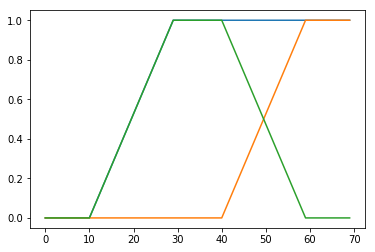

In [74]:
plt.plot(np.array(var1))
plt.plot(var2)
plt.plot(var1-var2)